# 1.2 - Background and Anomalies calculated by Boxplot 

___


1.0) Geological Setting and Mineral Disponibility 

1.1) Data Assessing and Data Cleaning

**1.2) Exploratory Data Analysis & Geostats**

2.1) Spatial Analysis

2.2) Hydrograph Basins Delimitations

2.3) Correlation between basins and samples

3.0) Conclusion

___

## Table Of Content


- [Importing Libraries](#libs)

- [Importing files](#files)

- [Exploratory Data Analysis](#eda)

- [1.2.1 Univariate Analysis](#uni)

- [1.2.2 Bivariate Analysis](#bi)

<a name = "libs" ><a/>
## Importing Libraries

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
import scipy as sp
import warnings

#spatial libs
import geopandas as gpd
import rasterio as rio
import pysheds
from pysheds.grid import Grid

warnings.filterwarnings("ignore")

%matplotlib inline

<a name = "files" ><a/>
## Importing Files

In [163]:
df = pd.read_csv('OUTPUTS/CSV/pontos_data_cleaned.csv', sep = ';')
df.head()

,Estação,N__Lab_,X,Y,Folha,Ag (ppm),Al (%),As (ppm),Ba (ppm),Be (ppm),...,Sn (ppm),Sr (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
0,AC-0002,CDE225,248757,7972050,Coromandel,0.03,2.63,4.0,76.0,1.0,...,1.5,3.3,7.4,0.03,0.70,73,0.3,13.15,27,6.3
1,AC-0003,CDE226,244460,7973135,Coromandel,0.02,1.93,2.0,84.0,1.7,...,1.6,3.1,8.2,0.06,0.94,58,0.3,23.90,58,6.9
2,AC-0004,CDE227,244044,7970217,Coromandel,0.04,1.47,3.0,70.0,0.7,...,0.9,3.9,5.4,0.04,0.65,55,0.2,10.40,34,1.8
3,AC-0005,CDE228,242895,7970593,Coromandel,0.05,1.72,23.0,80.0,1.1,...,1.1,3.1,6.9,0.04,1.01,66,0.7,9.34,27,4.1
4,AC-0006,CDE229,242999,7971416,Coromandel,0.04,0.97,7.0,56.0,0.5,...,0.7,2.5,5.7,0.05,0.82,41,0.4,7.45,28,1.5


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Estação     709 non-null    object 
 1   N__Lab_     709 non-null    object 
 2   X           709 non-null    int64  
 3   Y           709 non-null    int64  
 4   Folha       709 non-null    object 
 5   Ag (ppm)    709 non-null    float64
 6   Al (%)      709 non-null    float64
 7   As (ppm)    709 non-null    float64
 8   Ba (ppm)    709 non-null    float64
 9   Be (ppm)    709 non-null    float64
 10  Bi (ppm)    709 non-null    float64
 11  Ca (%)      709 non-null    float64
 12  Cd (ppm)    709 non-null    float64
 13  Ce (ppm)    709 non-null    float64
 14  Co (ppm)    709 non-null    float64
 15  Cr (ppm)    709 non-null    int64  
 16  Cs (ppm)    709 non-null    float64
 17  Cu (ppm)    709 non-null    float64
 18  Fe (%)      709 non-null    float64
 19  Ga (ppm)    709 non-null    f

<a name = "eda" ><a/>
## Exploratory Data Analysis

In [165]:
df.describe()

,X,Y,Ag (ppm),Al (%),As (ppm),Ba (ppm),Be (ppm),Bi (ppm),Ca (%),Cd (ppm),...,Sn (ppm),Sr (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
count,709.000000,7.090000e+02,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,...,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,290023.887165,7.940832e+06,0.068787,1.984654,5.803949,126.698166,1.354725,0.258166,0.077024,0.066248,...,1.864457,15.901269,11.531312,0.050804,1.431227,66.693935,0.379549,9.807955,37.609309,11.839492
std,30029.640792,2.326216e+04,0.295265,1.448399,4.538870,133.155984,1.537560,0.177348,0.118454,0.094204,...,1.743626,38.049190,14.197642,0.082466,1.341452,47.287505,0.708238,6.568492,20.887808,13.263890
min,236437.000000,7.897972e+06,0.010000,0.270000,1.000000,5.000000,0.100000,0.040000,0.010000,0.010000,...,0.300000,0.500000,0.900000,0.010000,0.210000,9.000000,0.100000,0.880000,3.000000,0.500000
25%,263830.000000,7.921369e+06,0.010000,1.100000,3.000000,68.000000,0.700000,0.150000,0.030000,0.030000,...,1.000000,4.100000,5.700000,0.010000,0.770000,38.000000,0.100000,5.640000,25.000000,4.600000
50%,292163.000000,7.942659e+06,0.040000,1.540000,5.000000,92.000000,1.100000,0.220000,0.060000,0.050000,...,1.500000,6.600000,7.600000,0.020000,1.040000,53.000000,0.200000,8.810000,34.000000,7.800000
75%,315374.000000,7.960605e+06,0.070000,2.370000,8.000000,137.000000,1.500000,0.320000,0.080000,0.080000,...,2.200000,12.700000,10.700000,0.060000,1.530000,81.000000,0.400000,12.090000,47.000000,13.100000
max,341723.000000,7.982200e+06,6.300000,11.090000,41.000000,1750.000000,30.500000,2.850000,1.890000,1.900000,...,35.200000,509.700000,120.700000,0.970000,12.020000,559.000000,12.800000,57.900000,194.000000,111.000000


### Transforming everything to log-scale

To make better analysis, let's transform everything to log-scale and then take a look at statistics.

In [166]:
#creating a df copy
copy = df.copy()

#removing coordinates
copy.drop(columns=['N__Lab_','X','Y', 'Folha'],inplace = True)

copy.head(2)

,Estação,Ag (ppm),Al (%),As (ppm),Ba (ppm),Be (ppm),Bi (ppm),Ca (%),Cd (ppm),Ce (ppm),...,Sn (ppm),Sr (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
0,AC-0002,0.03,2.63,4.0,76.0,1.0,0.31,0.05,0.03,57.37,...,1.5,3.3,7.4,0.03,0.70,73,0.3,13.15,27,6.3
1,AC-0003,0.02,1.93,2.0,84.0,1.7,0.29,0.04,0.01,59.14,...,1.6,3.1,8.2,0.06,0.94,58,0.3,23.90,58,6.9


In [167]:
df_log = copy.copy()

for col in df_log.columns:
    try:
        df_log[col] = np.absolute(np.log10(df_log[col]))
    except:
        pass
df_log.head(2)


,Estação,Ag (ppm),Al (%),As (ppm),Ba (ppm),Be (ppm),Bi (ppm),Ca (%),Cd (ppm),Ce (ppm),...,Sn (ppm),Sr (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
0,AC-0002,1.522879,0.419956,0.60206,1.880814,0.000000,0.508638,1.30103,1.522879,1.758685,...,0.176091,0.518514,0.869232,1.522879,0.154902,1.863323,0.522879,1.118926,1.431364,0.799341
1,AC-0003,1.698970,0.285557,0.30103,1.924279,0.230449,0.537602,1.39794,2.000000,1.771881,...,0.204120,0.491362,0.913814,1.221849,0.026872,1.763428,0.522879,1.378398,1.763428,0.838849


<a name="uni"></a>
## 1.2.1 Univariate Analysis

### Anomalies and Background

- John Tukey (1977) sets the following terms:
    
> 1st Order Anomalies: Q3 + 3AIQ

> 2nd Order Anomalies: Q3 + 1.5AIQ

> Background: Q2

- Another way of calculating is using MAD

> Anomalies: Median + 2MAD

In [168]:
#getting statistics

elements = df_log.columns[1:]

stats_list = []

for e in elements:
    minimun = np.min(df_log[e])
    q1 = np.percentile(df_log[e], 25)  # Q1
    mean = np.mean(df_log[e])
    median = np.median(df_log[e])
    q2 = np.percentile(df_log[e],50) #Q2
    maximun = np.max(df_log[e])
    q3 = np.percentile(df_log[e],75) #Q3
    std = np.std(df_log[e])
    var = std**2
    cv = ((std/mean)*100)
    skew = sp.stats.skew(df_log[e])
    kurtosis = sp.stats.kurtosis(df_log[e])
    aiq = q3-q1
    anomaly_1 = q3 + 3*aiq
    anomaly_2 = q3 + 1.5*aiq
    values = [e, minimun,q1, mean, median,q2, maximun,q3, std, var, cv, skew, kurtosis,aiq, anomaly_1, anomaly_2]
    stats_list.append(values)
    
#creating a statistic dataframe
df_stats = pd.DataFrame(stats_list)
df_stats.columns = ['element','min', 'q1', 'mean','median','background','max','q3','std','var','coefvar','skewness','kurtosis','aiq', '1anomaly','2anomaly']
df_stats
    

,element,min,q1,mean,median,background,max,q3,std,var,coefvar,skewness,kurtosis,aiq,1anomaly,2anomaly
0,Ag (ppm),0.000000,1.154902,1.459252,1.397940,1.397940,2.000000,2.000000,0.414721,0.171993,28.420091,-0.008719,-0.836885,0.845098,4.535294,3.267647
1,Al (%),0.000000,0.093422,0.257324,0.201397,0.201397,1.044932,0.385606,0.211369,0.044677,82.141159,1.099294,0.856480,0.292185,1.262160,0.823883
2,As (ppm),0.000000,0.477121,0.653958,0.698970,0.698970,1.612784,0.903090,0.316000,0.099856,48.321178,-0.190162,-0.144086,0.425969,2.180996,1.542043
3,Ba (ppm),0.698970,1.832509,1.993128,1.963788,1.963788,3.243038,2.136721,0.287819,0.082840,14.440586,0.289025,2.413650,0.304212,3.049356,2.593038
4,Be (ppm),0.000000,0.079181,0.227889,0.154902,0.154902,1.484300,0.301030,0.212271,0.045059,93.146652,1.583952,3.202273,0.221849,0.966576,0.633803
5,Bi (ppm),0.036212,0.494850,0.660862,0.657577,0.657577,1.397940,0.823909,0.243142,0.059118,36.791689,0.166883,-0.074208,0.329059,1.811085,1.317497
6,Ca (%),0.033424,1.096910,1.279940,1.221849,1.221849,2.000000,1.522879,0.350326,0.122728,27.370494,0.000619,0.465956,0.425969,2.800785,2.161832
7,Cd (ppm),0.142668,1.096910,1.330583,1.301030,1.301030,2.000000,1.522879,0.338163,0.114354,25.414647,-0.150974,0.251373,0.425969,2.800785,2.161832
8,Ce (ppm),0.787460,1.686815,1.847755,1.833466,1.833466,2.923788,1.965249,0.274483,0.075341,14.854935,0.455592,1.676160,0.278434,2.800550,2.382899
9,Co (ppm),0.000000,0.892095,1.088801,1.130334,1.130334,2.418633,1.324282,0.369761,0.136723,33.960423,-0.506765,0.720237,0.432188,2.620846,1.972564


### Boxplots and Histograms

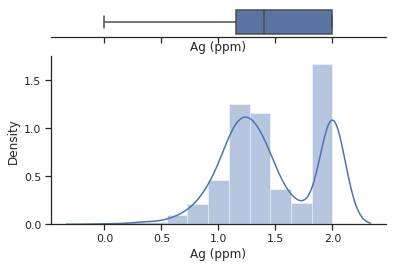

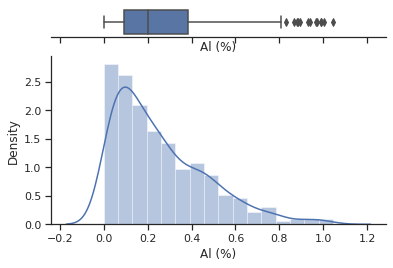

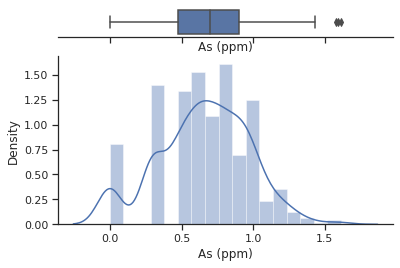

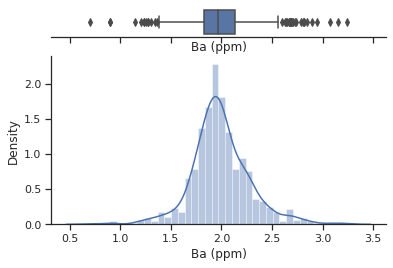

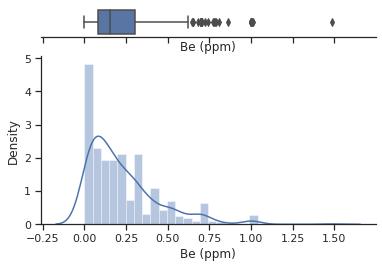

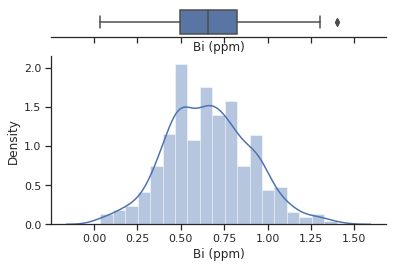

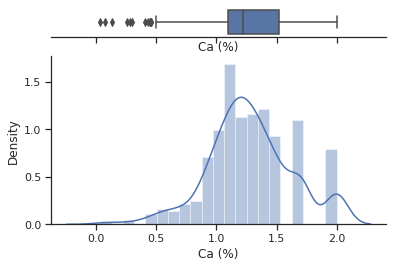

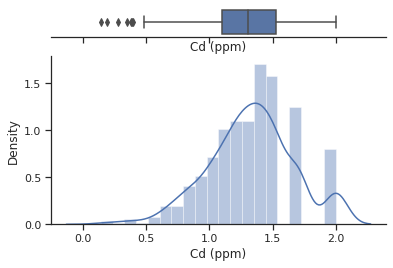

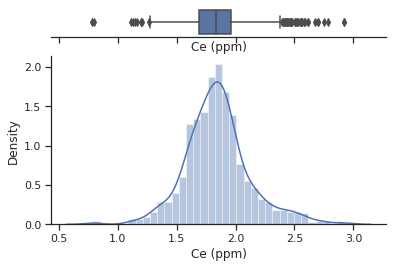

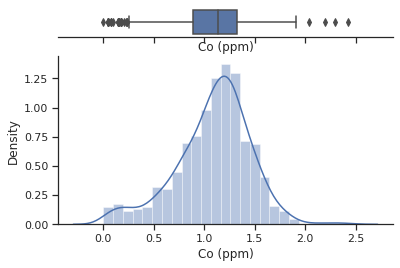

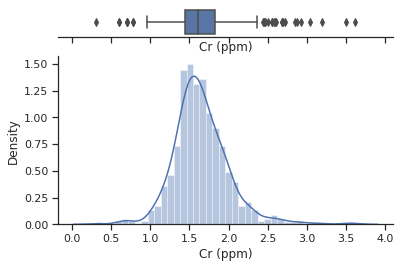

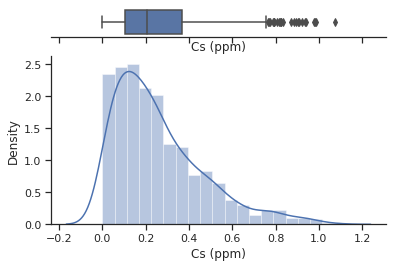

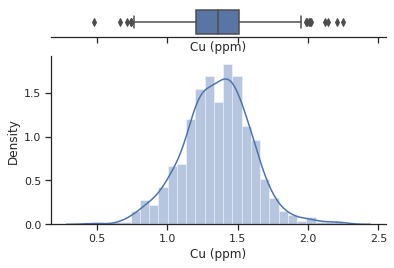

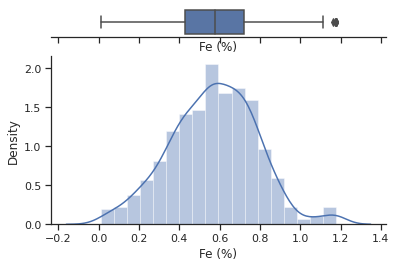

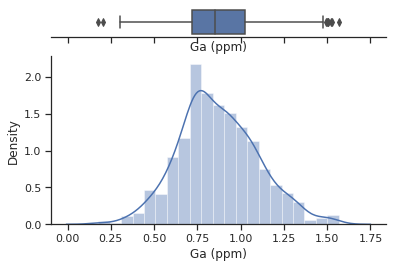

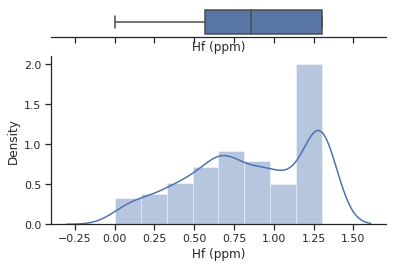

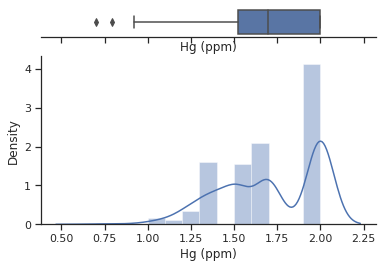

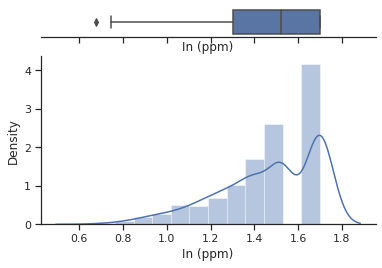

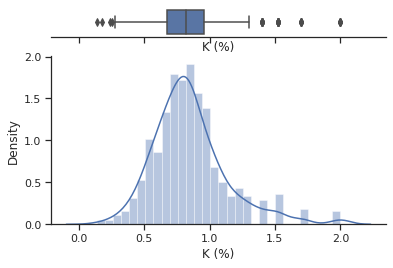

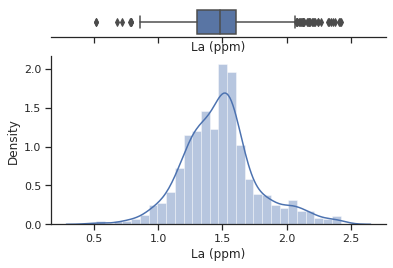

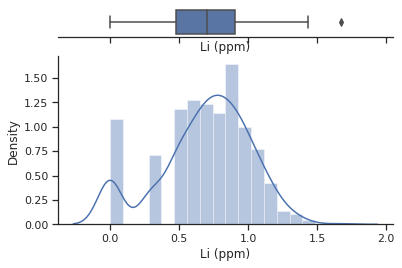

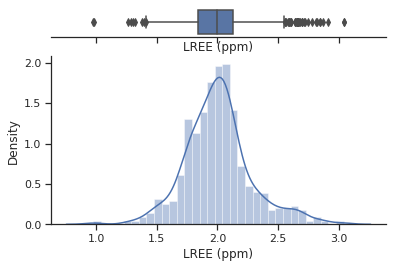

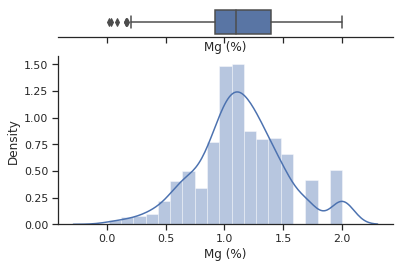

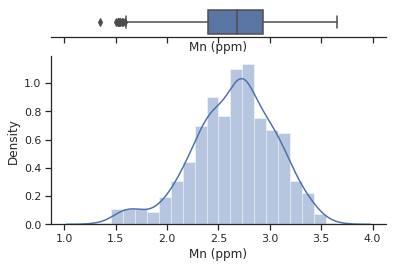

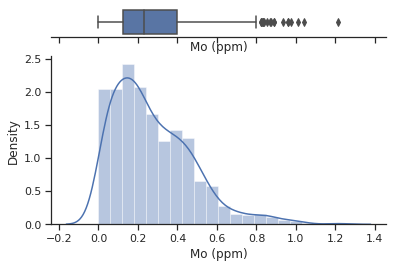

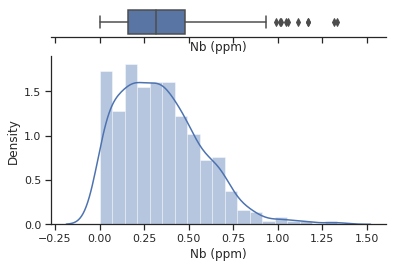

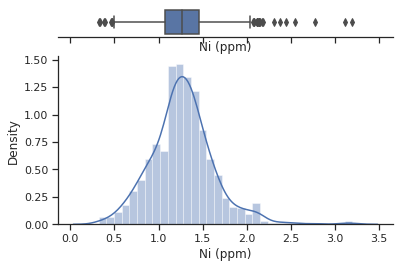

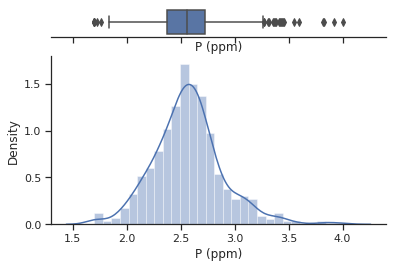

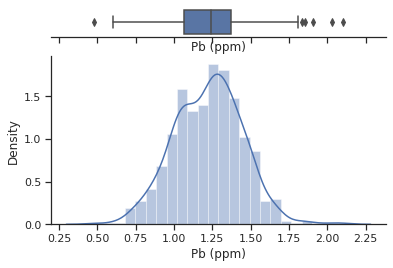

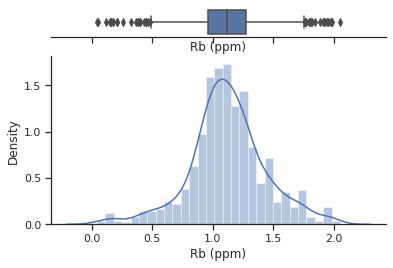

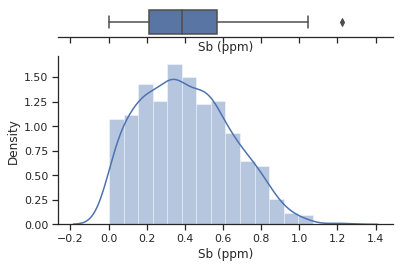

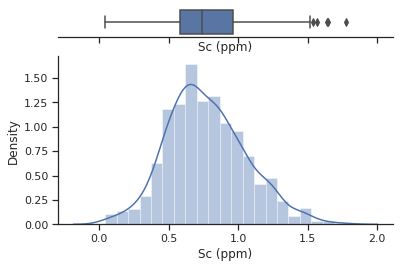

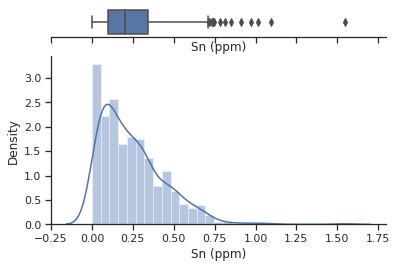

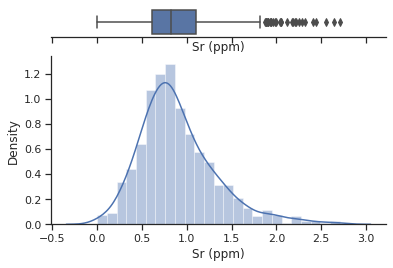

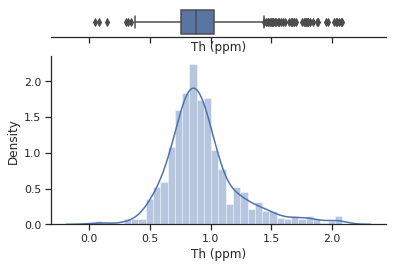

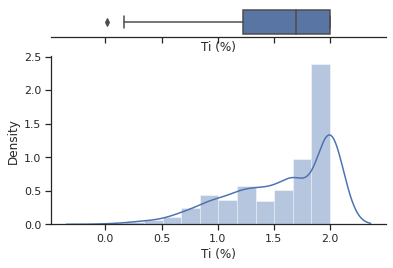

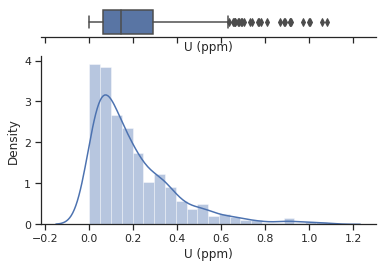

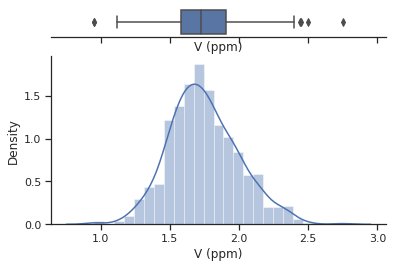

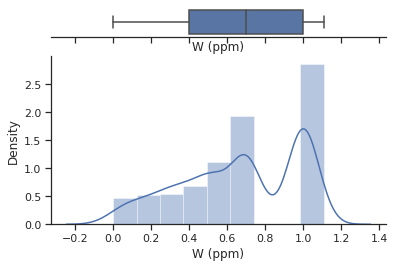

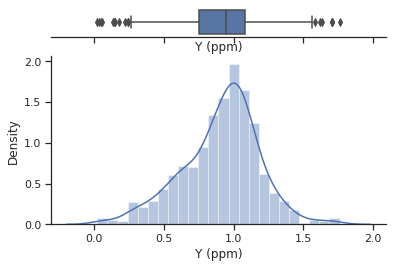

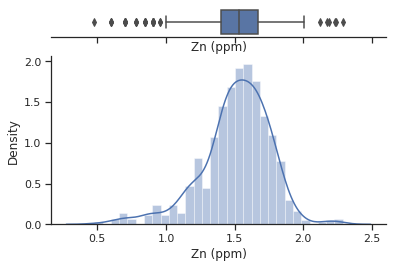

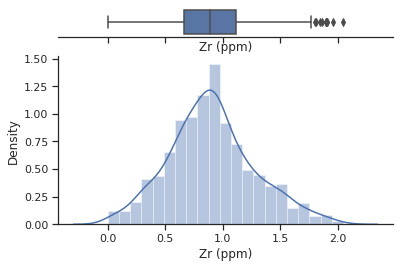

In [169]:
sb.set(style="ticks")

for col in elements:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

    sb.boxplot(df_log[col], ax=ax_box)
    sb.distplot(df_log[col], ax=ax_hist)

    ax_box.set(yticks=[])
    sb.despine(ax=ax_hist)
    sb.despine(ax=ax_box, left=True)

In [170]:
dft = df_stats.set_index('element').transpose(copy = True)
dft.to_csv('OUTPUTS/CSV/element_anomalies.csv', index = True, sep = ';')

## Looking for Stations with Anomalies

In [171]:
#1st order anomaly
anomaly = list(dft.iloc[-2])
#2nd order anomaly
second_anomaly = list(dft.iloc[-1])

In [172]:
anom_stations = []

#for the length of elements list
for i in range(len(elements)):
    i += 1                          #add 1 to the index 
                                    #(because the anomaly index starts at 0, and df_log index 0 is the station name)
    anom= anomaly[i-1]             #subtract 1 from index and then return the proper value in the list
    sec_anom = second_anomaly[i-1]
    values = df_log.iloc[:,i]       #getting only the specific element column
    name = values.name
    #print(name)                     #printing the element column
    list_values = list(values)      #transforming the column in a list of values. Each record is a sample
    for v in list_values:              
        if v >= anom:
            #if the anomaly is higher or equal the value print the 1st order anomaly
        
            #picking up the index of the value
            idx = list_values.index(v)
            #now, getting the station name based on the index
            station = df_log['Estação'][idx]
            x = df['X'][idx]
            y = df['Y'][idx]
            anom_type = '1'
            anom_list = [station, x, y, name, v, anom, anom_type]
            anom_stations.append(anom_list)
        elif sec_anom <= v < anom:
            #if the anomaly is higher or equal the 2nd order anomaly or lower than 1st order
        
            #picking up the index of the value
            idx = list_values.index(v)
            #now, getting the station name based on the index
            station = df_log['Estação'][idx]
            x = df['X'][idx]
            y = df['Y'][idx]
            anom_type = '2'
            anom_list = [station, x, y, name, v, sec_anom, anom_type]
            anom_stations.append(anom_list)
        else:
            pass
        
#creating dataframe and dropping duplicates
df_anom = pd.DataFrame(anom_stations, columns = ['station','x','y','element','value','anomaly', 'anom_type'])
df_anom.drop_duplicates(inplace = True)
df_anom.to_csv('OUTPUTS/CSV/elements_anomaly_filtered.csv', index = False)
df_anom

,station,x,y,element,value,anomaly,anom_type
0,EC-0122,281044,7961773,Al (%),0.884795,0.823883,2
1,BM0014,238782,7911968,Al (%),0.867467,0.823883,2
2,BM0028,236767,7925246,Al (%),0.894316,0.823883,2
3,BM-0174,332011,7908847,Al (%),0.972203,0.823883,2
4,EC-0124,321352,7910059,Al (%),0.940018,0.823883,2
...,...,...,...,...,...,...,...
545,SM-0083,339758,7955762,Zr (ppm),1.905796,1.799041,2
546,SM-0091,324828,7957056,Zr (ppm),1.801404,1.799041,2
548,LG-0028,317479,7901094,Zr (ppm),1.893207,1.799041,2
549,MR-0211,305520,7915678,Zr (ppm),1.848805,1.799041,2


## Conclusions on Univariate Analysis

- One

- Two

___

<a name="bi"></a>
# 1.2.2 Bivariate Analysis

## Spearman Correlation

In [173]:
#elements that have some kind of anomaly
anom_elements = list(df_anom['element'].unique())

<AxesSubplot:>

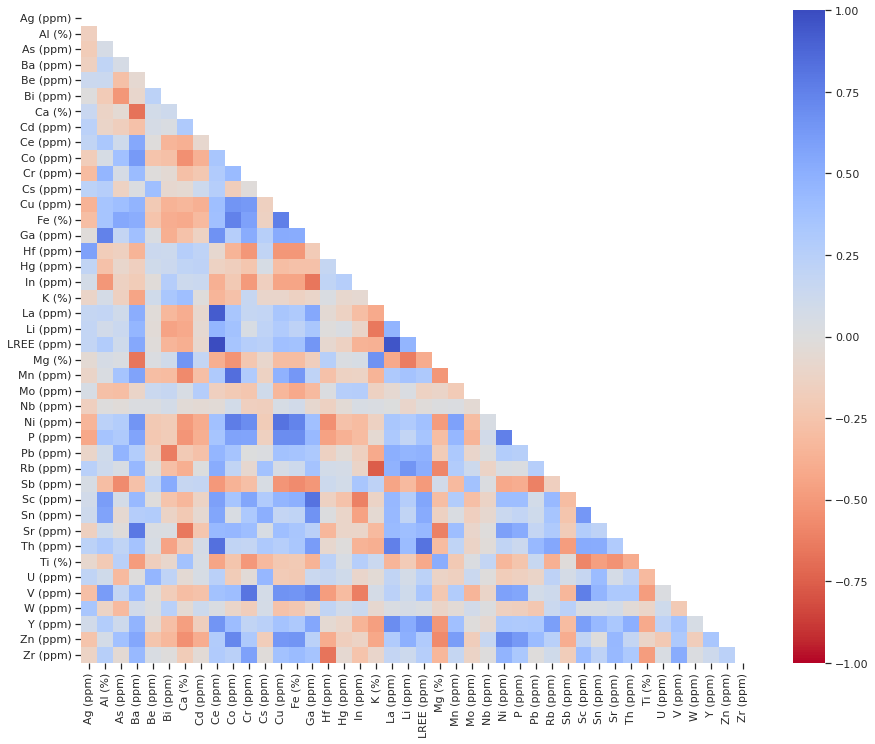

In [174]:
#making the correlation betweens elements
corr = df_log.corr(method="spearman")

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
plt.figure(figsize=(15,12))
# using the upper triangle matrix as mask 
sb.heatmap(corr, 
           annot=False,
           mask=matrix,
           fmt = '.2f',
           cmap = 'coolwarm_r',
          vmax = 1,
          vmin = -1)

## Selecting Values where Pvalue > 0.8

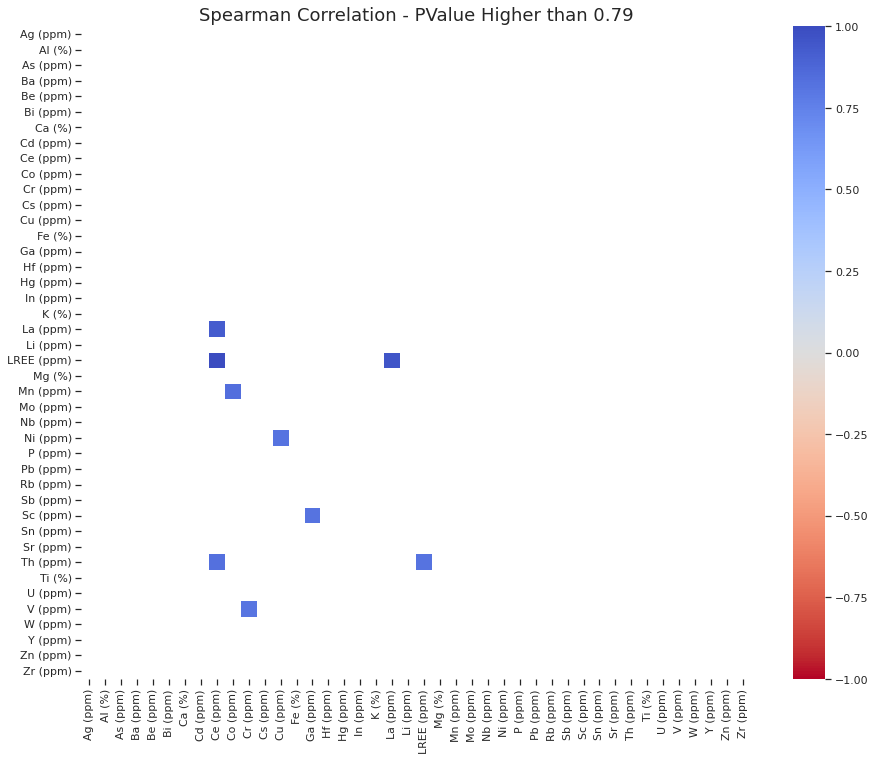

In [175]:
#selecting values where pvalue >0.8
kot = corr[corr>=0.8]

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(kot)
plt.figure(figsize=(15,12))
# using the upper triangle matrix as mask 
sb.heatmap(kot, 
           annot=False,
           mask=matrix,
           fmt = '.2f',
           cmap = 'coolwarm_r',
          vmax = 1,
          vmin = -1)
plt.title('Spearman Correlation - PValue Higher than 0.79', fontsize = 18);

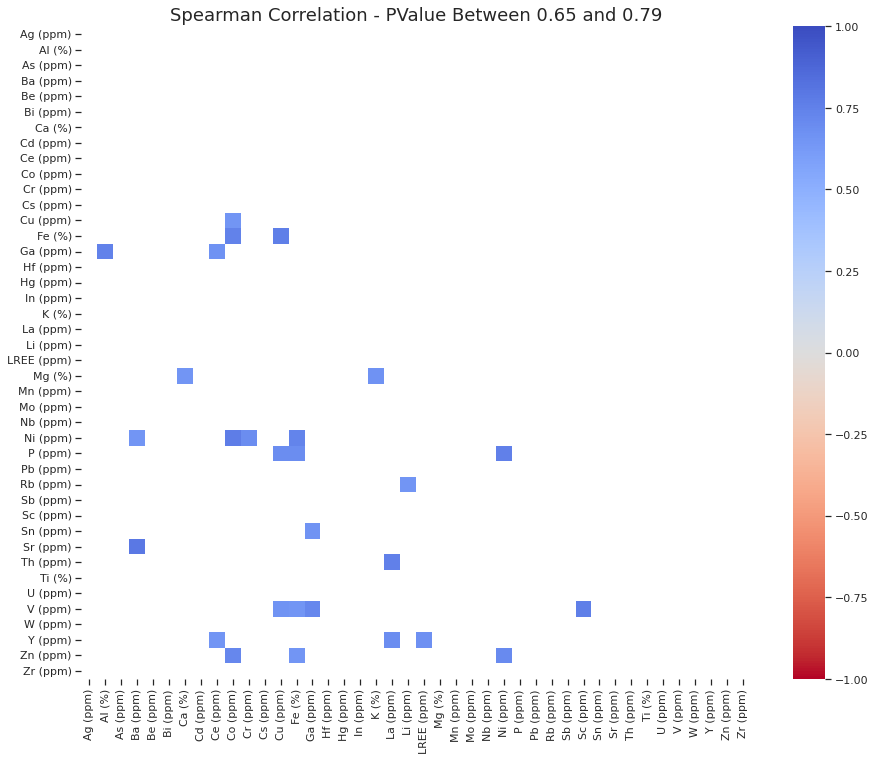

In [176]:
#selecting values where pvalue >0.65 
kot = corr[(corr>=0.65) & (corr < 0.8)]

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(kot)
plt.figure(figsize=(15,12))
# using the upper triangle matrix as mask 
sb.heatmap(kot, 
           annot=False,
           mask=matrix,
           fmt = '.2f',
           cmap = 'coolwarm_r',
          vmax = 1,
          vmin = -1)
plt.title('Spearman Correlation - PValue Between 0.65 and 0.79', fontsize = 18);

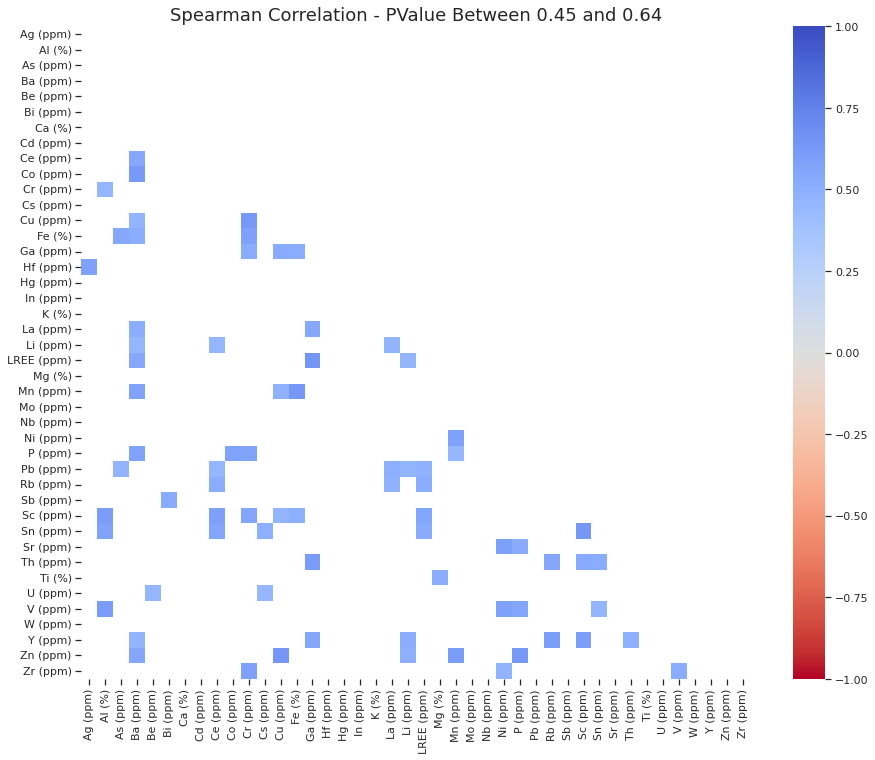

In [177]:
#selecting values where pvalue >0.45 
kot = corr[(corr>=0.45) & (corr < 0.65)]

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(kot)
plt.figure(figsize=(15,12))
# using the upper triangle matrix as mask 
sb.heatmap(kot, 
           annot=False,
           mask=matrix,
           fmt = '.2f',
           cmap = 'coolwarm_r',
          vmax = 1,
          vmin = -1)
plt.title('Spearman Correlation - PValue Between 0.45 and 0.64', fontsize = 18);

In [178]:
correlations = corr.abs().unstack()
high_corr = correlations[(correlations>=0.8) & (correlations<1)]
high_corr = high_corr.sort_values(ascending = False).reset_index()
high_corr.columns =['element1','element2','pvalue']
high_corr.drop_duplicates(subset='pvalue', keep="last", inplace = True)
#creating lists with the high corr elements
hc_element1 = list(high_corr['element1'])
hc_element2 = list(high_corr['element2'])

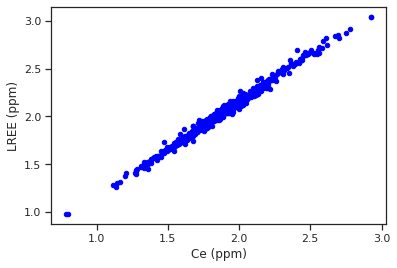

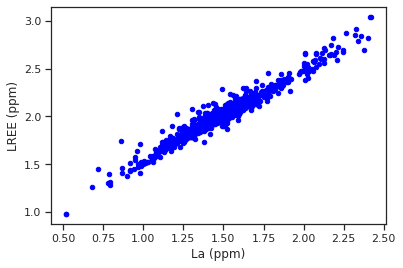

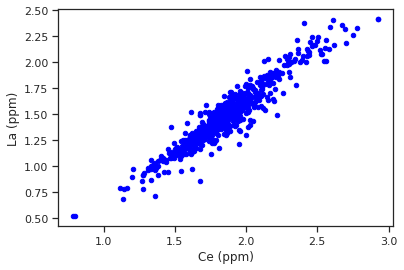

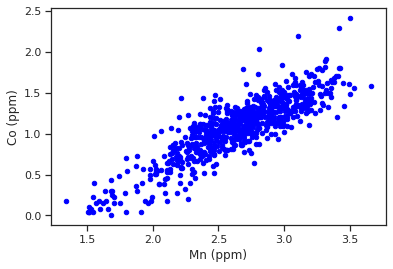

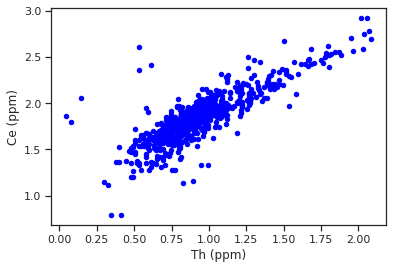

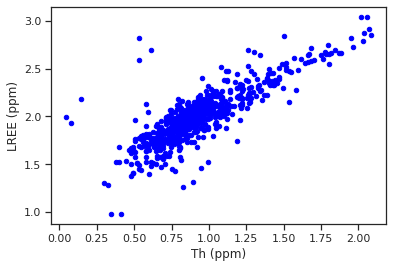

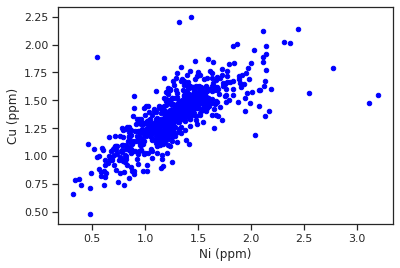

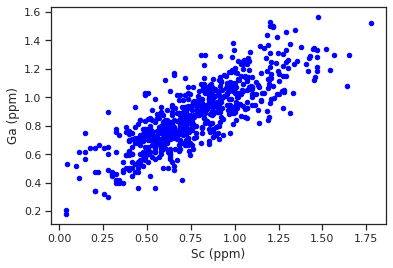

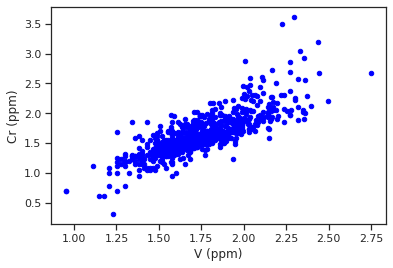

In [179]:
ele = []
for e1, e2 in zip(hc_element1, hc_element2):
    eles = [e1,e2]
    ele.append(eles)   
    df_scatter = df_log.filter(items = eles)
    df_scatter.plot(kind = 'scatter', x = e1, y = e2, color = 'blue')
    

In [180]:
medium_corr = correlations[(correlations>=0.65) & (correlations<0.8)]
medium_corr = medium_corr.sort_values(ascending = False).reset_index()
medium_corr.columns =['element1','element2','pvalue']
medium_corr.drop_duplicates(subset='pvalue', keep="last", inplace = True)
medium_corr


,element1,element2,pvalue
1,Sr (ppm),Ba (ppm),0.793367
3,Co (ppm),Ni (ppm),0.769074
5,Sc (ppm),V (ppm),0.765260
7,Fe (%),Cu (ppm),0.763513
9,K (%),Rb (ppm),0.763222
11,Ni (ppm),P (ppm),0.754606
13,Th (ppm),La (ppm),0.752897
15,Al (%),Ga (ppm),0.744211
17,Co (ppm),Fe (%),0.742937
19,Fe (%),Ni (ppm),0.739654


In [181]:
low_corr = correlations[(correlations>=0.45) & (correlations<0.65)]
low_corr = low_corr.sort_values(ascending = False).reset_index()
low_corr.columns =['element1','element2','pvalue']
low_corr.drop_duplicates(subset='pvalue', keep="last", inplace = True)
low_corr


,element1,element2,pvalue
1,Sr (ppm),Ca (%),0.648981
3,LREE (ppm),Ga (ppm),0.643952
5,Mn (ppm),Fe (%),0.638224
7,Cu (ppm),Zn (ppm),0.638093
9,Sn (ppm),Sc (ppm),0.635370
...,...,...,...
231,Ce (ppm),Pb (ppm),0.455738
233,Cr (ppm),Al (%),0.455201
235,P (ppm),Mn (ppm),0.452147
237,Bi (ppm),Th (ppm),0.451864


## Conclusion on Bivariate Analysis

- One

- Two



In [23]:
# reading saved CSV file
df_anom = pd.read_csv('OUTPUTS/CSV/elements_anomaly_filtered.csv')

#transforming anomaly dataframe to geodataframe
gdf = gpd.GeoDataFrame(
    df_anom,
    geometry = gpd.points_from_xy(df_anom.x, df_anom.y)
)

#saving data with spatial information
gdf.to_csv('OUTPUTS/CSV/elements_anomaly_filtered_spatialData.csv', index = False)


#loading geologic shapefiles
lito = gpd.read_file('./shapefiles/Unidades_litoestratigráficas___1_100_000.shp')


In [24]:
gdf.head()

,station,x,y,element,value,anomaly,anom_type,geometry
0,EC-0122,281044,7961773,Al (%),0.884795,0.823883,2,POINT (281044.000 7961773.000)
1,BM0014,238782,7911968,Al (%),0.867467,0.823883,2,POINT (238782.000 7911968.000)
2,BM0028,236767,7925246,Al (%),0.894316,0.823883,2,POINT (236767.000 7925246.000)
3,BM-0174,332011,7908847,Al (%),0.972203,0.823883,2,POINT (332011.000 7908847.000)
4,EC-0124,321352,7910059,Al (%),0.940018,0.823883,2,POINT (321352.000 7910059.000)


In [60]:
#setting the CRS of the points 
gdf.set_crs('epsg:31983', inplace = True)

,station,x,y,element,value,anomaly,anom_type,geometry
0,EC-0122,281044,7961773,Al (%),0.884795,0.823883,2,POINT (281044.000 7961773.000)
1,BM0014,238782,7911968,Al (%),0.867467,0.823883,2,POINT (238782.000 7911968.000)
2,BM0028,236767,7925246,Al (%),0.894316,0.823883,2,POINT (236767.000 7925246.000)
3,BM-0174,332011,7908847,Al (%),0.972203,0.823883,2,POINT (332011.000 7908847.000)
4,EC-0124,321352,7910059,Al (%),0.940018,0.823883,2,POINT (321352.000 7910059.000)
...,...,...,...,...,...,...,...,...
545,SM-0083,339758,7955762,Zr (ppm),1.905796,1.799041,2,POINT (339758.000 7955762.000)
546,SM-0091,324828,7957056,Zr (ppm),1.801404,1.799041,2,POINT (324828.000 7957056.000)
548,LG-0028,317479,7901094,Zr (ppm),1.893207,1.799041,2,POINT (317479.000 7901094.000)
549,MR-0211,305520,7915678,Zr (ppm),1.848805,1.799041,2,POINT (305520.000 7915678.000)


In [62]:
#checking CRS information
gdf.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - 48°W to 42°W
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [63]:
#transforming CRS from 31983 to 4326
gdf.to_crs(4326, inplace = True)

In [64]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [65]:
#filtering only 1st order anomaly from anomalies table
anomOne = gdf.loc[gdf['anom_type'] == "1"]
print(f'In total, there are {len(anomOne)} samples classified as Anomaly Type 1.')

In total, there are 42 samples classified as Anomaly Type 1.


In [76]:
#filtering only 2nd order anomaly from anomalies table
anomTwo = gdf.loc[gdf['anom_type'] == "2"]
print(f'In total, there are {len(anomTwo)} samples classified as Anomaly Type 2.')

In total, there are 430 samples classified as Anomaly Type 2.


In [25]:
lito.head()

,ID_UNIDADE,SIGLA,HIERARQUIA,NOME,AMBIENTE_T,SUB_AMBIEN,SIGLA_PAI,NOME_PAI,LEGENDA,ESCALA,...,ERA_MIN,ERA_MAX,SISTEMA_MI,SISTEMA_MA,EPOCA_MIN,EPOCA_MAX,SIGLAS_HIS,SHAPE_AREA,SHAPE_LEN,geometry
0,5678,NP1amx,Unidade,"Unidade Araxá, micaxisto",None,None,NParx,NParx - Grupo Araxá,(Granada)-mica xistos com níveis de quartzitos...,1:100.000,...,Neoproterozóico,Neoproterozóico,Toniano,Toniano,Wenloquiano,Wenloquiano,None,0.000012,0.018612,"POLYGON ((-47.49203 -19.00000, -47.49204 -19.0..."
1,1498,Q1di,Unidade,Unidade Depósitos detríticos indiferenciados,None,None,None,None,"Cobertura detrítica inconsolidada, formada por...",1:100.000,...,Cenozóico,Cenozóico,Neogeno,Neogeno,Superior,Superior,N3di,0.000042,0.032530,"POLYGON ((-47.28336 -19.00000, -47.29740 -19.0..."
2,1498,Q1di,Unidade,Unidade Depósitos detríticos indiferenciados,None,None,None,None,"Cobertura detrítica inconsolidada, formada por...",1:100.000,...,Cenozóico,Cenozóico,Neogeno,Neogeno,Superior,Superior,N3di,0.038793,5.265542,"POLYGON ((-47.45074 -18.76916, -47.45152 -18.7..."
3,5678,NP1amx,Unidade,"Unidade Araxá, micaxisto",None,None,NParx,NParx - Grupo Araxá,(Granada)-mica xistos com níveis de quartzitos...,1:100.000,...,Neoproterozóico,Neoproterozóico,Toniano,Toniano,Wenloquiano,Wenloquiano,None,0.002387,1.356382,"POLYGON ((-47.11283 -18.89145, -47.11291 -18.8..."
4,955,NP3irv,Formação,Formação Rio Verde,None,None,NPi,NPi - Grupo Ibiá,"Filito, calcixisto, clorita xisto, sericita xi...",1:100.000,...,Neoproterozóico,Neoproterozóico,Ediacarano,Ediacarano,Pridoliano,Pridoliano,NPrv,0.034263,7.809570,"POLYGON ((-47.25837 -18.50000, -47.25836 -18.5..."


In [84]:
oneJoin = gpd.sjoin(anomOne, lito, how = "left", op="within")
oneJoin.head()

,station,x,y,element,value,anomaly,anom_type,geometry,index_right,ID_UNIDADE,...,EON_MAX,ERA_MIN,ERA_MAX,SISTEMA_MI,SISTEMA_MA,EPOCA_MIN,EPOCA_MAX,SIGLAS_HIS,SHAPE_AREA,SHAPE_LEN
36,SQ-0020A,339604,7952821,Ba (ppm),3.155032,3.049356,1,POINT (-46.51941 -18.50903),1116,723,...,Proterozóico,Neoproterozóico,Neoproterozóico,Ediacarano,Ediacarano,Pridoliano,Pridoliano,NP2ss,0.000773,0.336361
37,SQ-0021,337232,7952778,Ba (ppm),3.243038,3.049356,1,POINT (-46.54188 -18.50923),1116,723,...,Proterozóico,Neoproterozóico,Neoproterozóico,Ediacarano,Ediacarano,Pridoliano,Pridoliano,NP2ss,0.000773,0.336361
38,SQ-0024,335287,7949753,Ba (ppm),3.073352,3.049356,1,POINT (-46.56054 -18.53641),966,723,...,Proterozóico,Neoproterozóico,Neoproterozóico,Ediacarano,Ediacarano,Pridoliano,Pridoliano,NP2ss,0.054810,18.927352
41,EC-0122,281044,7961773,Be (ppm),1.000000,0.966576,1,POINT (-47.07294 -18.42290),1041,1498,...,Fanerozóico,Cenozóico,Cenozóico,Neogeno,Neogeno,Superior,Superior,N3di,0.009870,1.085807
55,MR0046,253953,7945025,Be (ppm),1.012837,0.966576,1,POINT (-47.33132 -18.57118),731,5678,...,Proterozóico,Neoproterozóico,Neoproterozóico,Toniano,Toniano,Wenloquiano,Wenloquiano,None,0.007145,0.866590


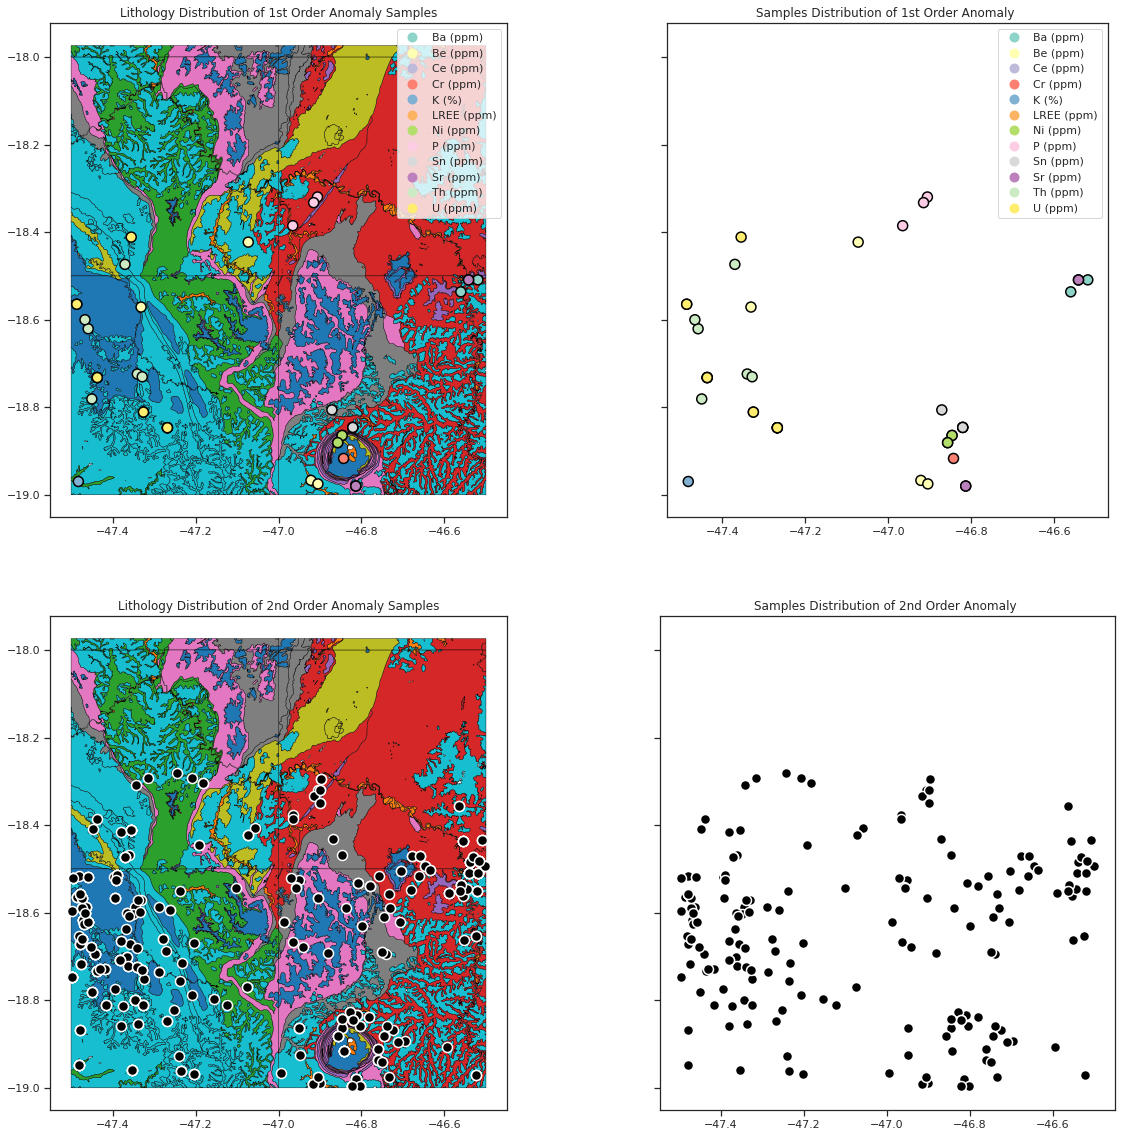

In [139]:
fig, axes = plt.subplots(nrows = 2,
                         ncols=2,
                         sharey=True,
                         figsize = (20,20)
                        )

# add geopandas plot to left subplot
lito.plot(ax=axes[0,0],
       column="NOME",
       edgecolor = 'black',
       linewidth = 0.4,
       figsize = (12,10)
              )
anomOne.plot(ax=axes[0,0],
             column = 'element',
             cmap = 'Set3',
             edgecolor = 'black',
             markersize= 100,
             linewidth = 1.5,
             legend = True)
axes[0,0].set_title('Lithology Distribution of 1st Order Anomaly Samples');

#add geopandas plot to the right suplot
lito.plot(ax=axes[1,0],
          column="NOME",
          edgecolor = 'black',
          linewidth = 0.4,
         )

anomTwo.plot(ax=axes[1,0],
             color = 'black',
             edgecolor = 'w',
             linewidth = 1.5,
             markersize= 100)

axes[1,0].set_title('Lithology Distribution of 2nd Order Anomaly Samples');

#add geopandas plot to the left bottom
anomOne.plot(ax=axes[0,1],
             column = 'element',
             cmap = 'Set3',
             edgecolor = 'black',
             markersize= 100,
             linewidth = 1.5,
             legend = True)
axes[0,1].set_title('Samples Distribution of 1st Order Anomaly ');


#add to the right bottom
anomTwo.plot(ax=axes[1,1],
             color = 'black',
             edgecolor = 'w',
             linewidth = 1.5,
             markersize= 100)
axes[1,1].set_title('Samples Distribution of 2nd Order Anomaly ');

fig.savefig('anomalies_distribuition.jpeg', bbox_inches = 'tight')

In [86]:
oneJoin.columns

Index(['station', 'x', 'y', 'element', 'value', 'anomaly', 'anom_type',
       'geometry', 'index_right', 'ID_UNIDADE', 'SIGLA', 'HIERARQUIA', 'NOME',
       'AMBIENTE_T', 'SUB_AMBIEN', 'SIGLA_PAI', 'NOME_PAI', 'LEGENDA',
       'ESCALA', 'MAPA', 'LITOTIPOS', 'RANGE', 'IDADE_MIN', 'IDADE_MAX',
       'EON_MIN', 'EON_MAX', 'ERA_MIN', 'ERA_MAX', 'SISTEMA_MI', 'SISTEMA_MA',
       'EPOCA_MIN', 'EPOCA_MAX', 'SIGLAS_HIS', 'SHAPE_AREA', 'SHAPE_LEN'],
      dtype='object')

In [141]:
oneJoinFilter = oneJoin.filter(items = ['station', 'x', 'y',
                                        'element', 'value',
                                        'anomaly', 'anom_type',
                                        'geometry', 'SIGLA',
                                        'NOME', 'LITOTIPOS',
                                        'LEGENDA']
                              )
oneJoinFilter.to_csv('OUTPUTS/CSV/relation_sample_firstOrder_lithology.csv', index = False)

In [142]:
oneJoinFilter.head()

,station,x,y,element,value,anomaly,anom_type,geometry,SIGLA,NOME,LITOTIPOS,LEGENDA
36,SQ-0020A,339604,7952821,Ba (ppm),3.155032,3.049356,1,POINT (-46.51941 -18.50903),NP3sd,Formação Serra da Saudade,"Arenito, Metapelito, Metargilito, Metassiltito",Sequência de sedimentos terrígenos intercalado...
37,SQ-0021,337232,7952778,Ba (ppm),3.243038,3.049356,1,POINT (-46.54188 -18.50923),NP3sd,Formação Serra da Saudade,"Arenito, Metapelito, Metargilito, Metassiltito",Sequência de sedimentos terrígenos intercalado...
38,SQ-0024,335287,7949753,Ba (ppm),3.073352,3.049356,1,POINT (-46.56054 -18.53641),NP3sd,Formação Serra da Saudade,"Arenito, Metapelito, Metargilito, Metassiltito",Sequência de sedimentos terrígenos intercalado...
41,EC-0122,281044,7961773,Be (ppm),1.000000,0.966576,1,POINT (-47.07294 -18.42290),Q1di,Unidade Depósitos detríticos indiferenciados,"Areia, Argila, Siltito","Cobertura detrítica inconsolidada, formada por..."
55,MR0046,253953,7945025,Be (ppm),1.012837,0.966576,1,POINT (-47.33132 -18.57118),NP1amx,"Unidade Araxá, micaxisto",Mica xisto,(Granada)-mica xistos com níveis de quartzitos...


In [151]:
totalLitho = oneJoinFilter.LITOTIPOS.nunique()
totalFm = oneJoinFilter.NOME.nunique()
print(f'In total, there are 1st order anomalies samples in {totalLitho} lithologies.\nThey belong to a total of {totalFm} Units/Formations')


In total, there are 1st order anomalies samples in 10 lithologies.
They belong to a total of 12 Units/Formations


In [157]:
print('As Unidades e Formações são as seguintes: \n')
for i in oneJoinFilter.NOME.unique():
    print(i)

As Unidades e Formações são as seguintes: 

Formação Serra da Saudade
Unidade Depósitos detríticos indiferenciados
Unidade Araxá, micaxisto
Depósitos aluvionares
Complexo Monte Carmelo
Litofácies Hidrelétrica da Batalha, filito
Suíte intrusiva Serra Negra
Coberturas eluvionares detrito-lateríticas
Formação Marília
Formação Serra de Santa Helena
Membro Serra da Anta
Unidade Abadia dos Dourados, filito


In [160]:
print('As litologias com maior concentração de anomalias são: \n')
for i in oneJoinFilter.LITOTIPOS.unique():
    print(i)

As litologias com maior concentração de anomalias são: 

Arenito, Metapelito, Metargilito, Metassiltito
Areia, Argila, Siltito
Mica xisto
Areia, Areia arcoseana, Argila, Cascalho, Conglomerado polimítico, Silte
None
Filito, Quartzito
Piroxenito
Conglomerado oligomítico, Laterita
Arenito, Argilito arenoso
Arenito, Argilito, Calcário, Calcário calcítico, Calcário dolomítico, Folhelho, Marga, Metarenito, Metargilito, Metassiltito, Siltito
Filito, Filito grafítico, Quartzito, Quartzito ferruginoso


### Analysis: 

- Due to the fact that these samples are sediment-stream samples, we cannot confirm that there's a relation between the anomalous element concentration with the local lithology. That's why we need to use another approch. In this case, we'll use a MDE to delimitate all basins and try to spot tha main source of each anomaly.

In [37]:
grid = Grid.from_raster('mde.tif')
dem = grid.read_raster('mde.tif')

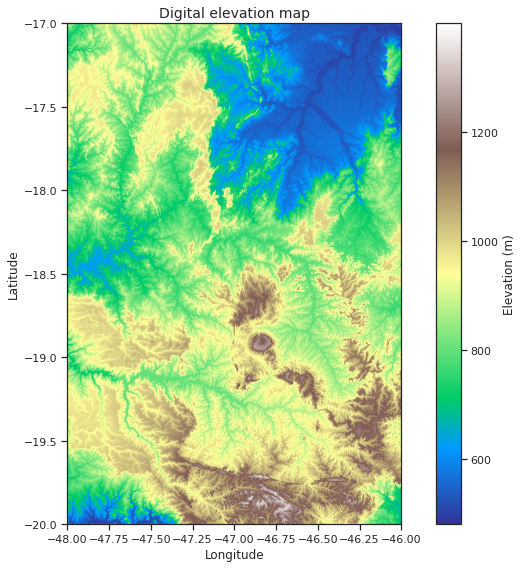

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
fig.patch.set_alpha(0)

plt.imshow(dem, extent=grid.extent, cmap='terrain', zorder=1)
plt.colorbar(label='Elevation (m)')
plt.grid(zorder=0)
plt.title('Digital elevation map', size=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()